In [7]:
import tensorflow as tf


In [16]:
# Datamanipulation and math packages
import numpy as np 
import pandas as pd
import re
import collections
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.linear_model import LogisticRegression, RidgeClassifier

# text preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import nltk 
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical

#data modeling
from keras import layers
from keras import models
from keras import regularizers
from keras.models import Sequential

# Data Viz
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string



In [9]:
# Global Vars
NUM_WORDS = 17500
NB_START_EPOCHS = 50  # Number of epochs we usually start to train with
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent
MAX_LEN = 20

In [17]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## Here are some data import and processing function calls 

In [10]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [12]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [31]:
train_df_clean = train_df[['text','target']]

In [32]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

train_df_clean['text'] = train_df_clean['text'].apply(lambda x: remove_punct(x))

In [33]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

train_df_clean['text'] = train_df_clean['text'].apply(lambda x: tokenization(x.lower()))

In [34]:
train_df_clean

,text,target
5056,"[coming, later, this, year, the, man, that, ta...",1
3472,"[young, dancer, moves, about, youth, in, atten...",1
4790,"[nearly, had, a, heart, attack, just, now, lou...",1
1792,"[incident, crash, in, pascoe, vale, south, out...",1
2423,"[three, episodes, left, the, end, is, nigh]",0
...,...,...
3931,"[internet, basics, the, flood, defective, inte...",1
1120,"[antpips, johnejefferson, obviously, im, aware...",1
6102,"[the, sinking, ship, sinkingshipindy, scarlet,...",0
6755,"[guys, he, can, run, so, fast, he, creates, a,...",0


(-0.5, 399.5, 199.5, -0.5)

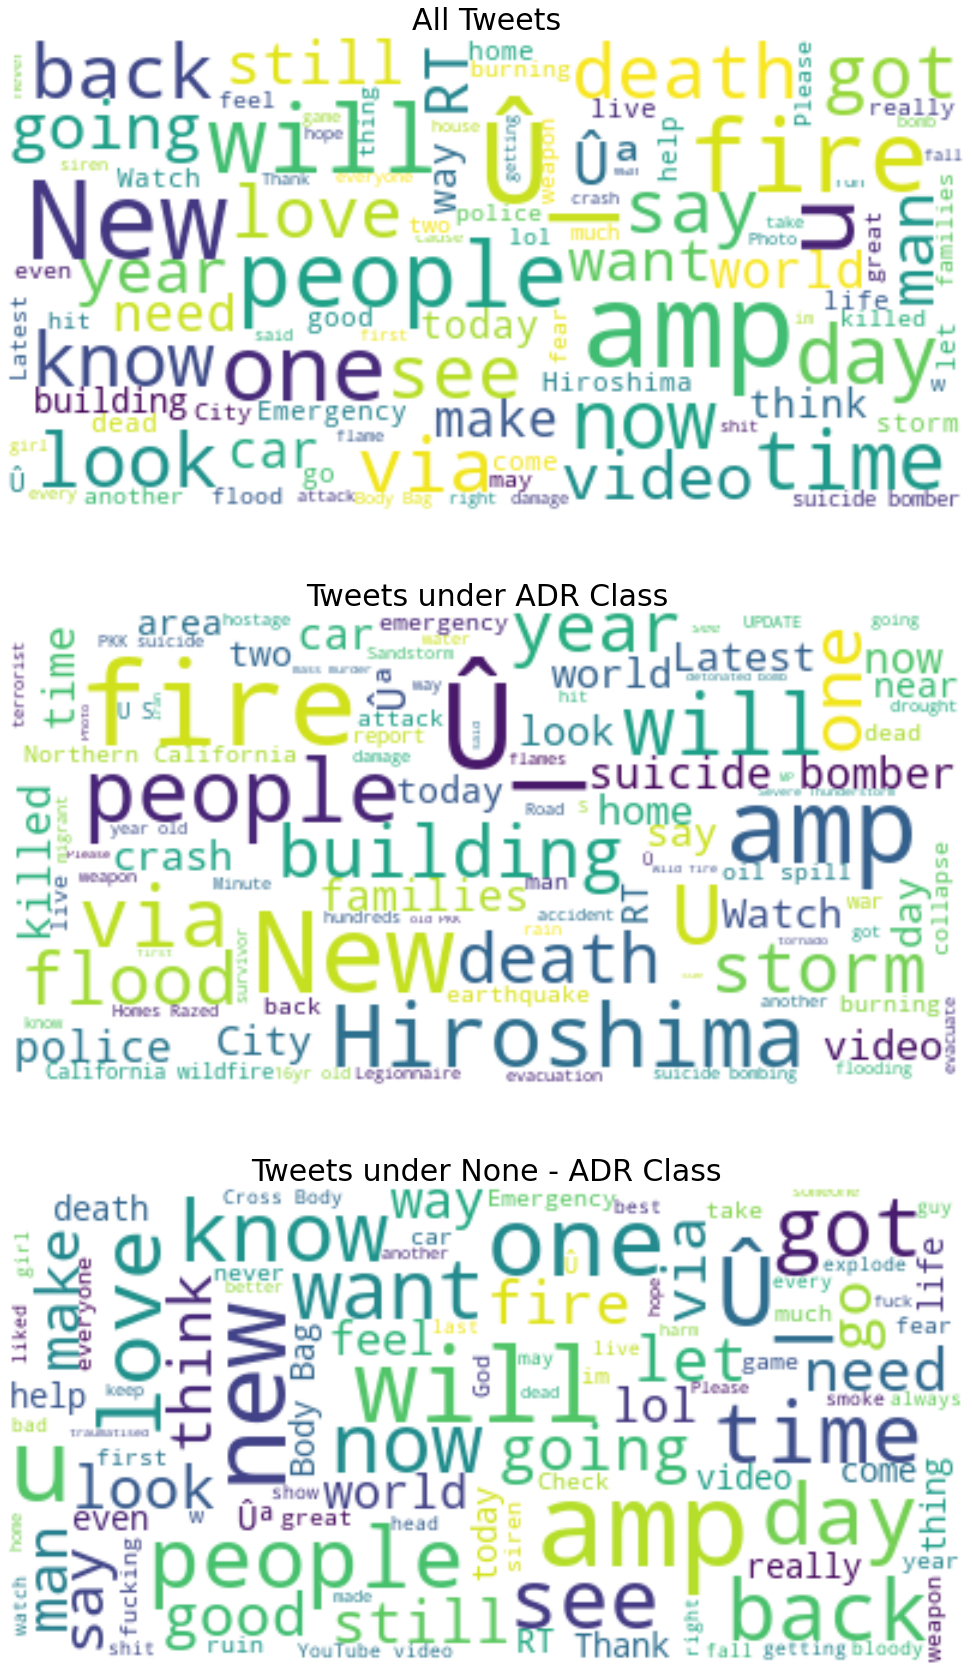

In [37]:
df_ADR = training_df_clean[training_df_clean['target']==1]
df_NADR = training_df_clean[training_df_clean['target']==0]
tweet_All = " ".join(review for review in training_df_clean.text)
tweet_ADR = " ".join(review for review in df_ADR.text)
tweet_NADR = " ".join(review for review in df_NADR.text)

fig, ax = plt.subplots(3, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_ADR = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_ADR)
wordcloud_NADR = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_NADR)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_ADR, interpolation='bilinear')
ax[1].set_title('Tweets under ADR Class',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_NADR, interpolation='bilinear')
ax[2].set_title('Tweets under None - ADR Class',fontsize=30)
ax[2].axis('off')